Supervised Learning: Linear Regression
In this section we will be going over linear regression. We'll be going over how to use the scikit-learn regression model, as well as how to train the regressor using the fit() method, and how to predict new labels using the predict() method. We'll be analyzing a data set consisting of house prices in Boston. We'll start off with a single variable linear regression using numpy and then move on to using scikit learn. We'll do an overview of the mathematics behind the method we're using, but mostly we'll dive deeper into pratical "hands-on" coding lessons.

If you're interested in the deeper mathematics of linear regession methods, check out the wikipedia page and also check out Andrew Ng's wonderful lectures for free on youtube.

In this section we will be working through linear regression with the following steps:

Step 1: Getting and setting up the data.
Step 2: Visualizing current data.
Step 3: The mathematics behind the Least Squares Method.
Step 4: Using Numpy for a Univariate Linear Regression.
Step 5: Getting the error.
Step 6: Using scikit learn to implement a multivariate regression.
Step 7: Using Training and Validation.  
Step 8: Predicting Prices
Step 9 : Residual Plots

Step 1: Getting started with data and setting it up

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline


In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,u'Number of houses')

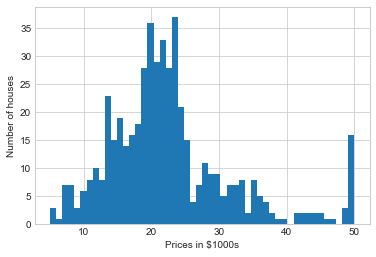

In [6]:
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0,0.5,u'Prices in $1000s')

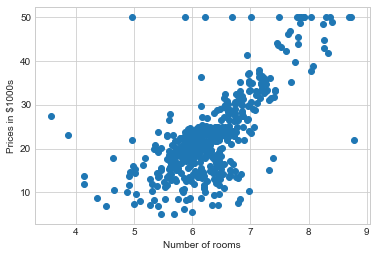

In [7]:
plt.scatter(boston.data[:,5],boston.target)

plt.xlabel('Number of rooms')
plt.ylabel('Prices in $1000s')

In [8]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df['Price'] = boston.target

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


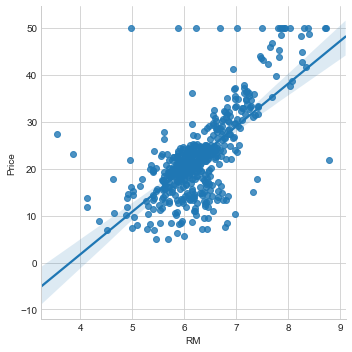

In [11]:
sns.lmplot('RM','Price',data=boston_df)

In [31]:
A = boston_df.RM

In [33]:
A = np.vstack(boston_df.RM)

In [34]:
A.shape

(506L, 1L)

In [35]:
B = boston_df.Price

In [36]:
A = np.array([[value,1]for value in A])

In [37]:
A

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [38]:
m,b = np.linalg.lstsq(A,B)[0]

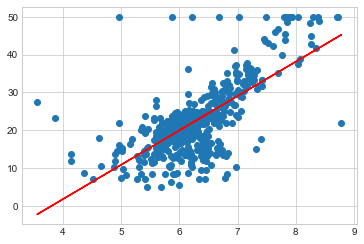

In [40]:
plt.plot(boston_df.RM,boston_df.Price,'o')

x = boston_df.RM

plt.plot(x, m*x + b, 'r',label='Best Fit Line')

In [41]:
result = np.linalg.lstsq(A,B)

error_total = result[1]

rmse = np.sqrt(error_total/len(A))

print 'The root mean square error was %.2f' %rmse

The root mean square error was 6.60


In [42]:
import sklearn

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lreg = LinearRegression()

In [45]:
X_multi = boston_df.drop('Price',1)

Y_target = boston_df.Price

In [46]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
print 'The estimated intercept coefficient is %.2f' %lreg.intercept_

print 'The number of coefficients used was %d ' %len(lreg.coef_)

The estimated intercept coefficient is 36.49
The number of coefficients used was 13 


In [50]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [52]:
import sklearn.cross_validation

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [86]:
#train and test
X_train,X_test,Y_train,Y_test = sklearn.cross_validation.train_test_split(A,boston_df.Price)

In [70]:
Y_train = np.vstack(boston_df)

In [87]:
print X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

(379L, 2L) (127L, 2L) (379L,) (127L,)


In [88]:
lreg = LinearRegression()

In [89]:
np.asarray(X_train).dtype
np.unique(map(len, X_train))

array([2])

In [90]:
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [92]:
print "Fit a model with X_train, and calculate the MSE with Y_train: %.2f" %np.mean((Y_train-pred_train)**2)

print "Fit a model with X_train, and calculate the MSE with X_test and Y_test: %.2f" % np.mean((Y_test - pred_test)**2)

Fit a model with X_train, and calculate the MSE with Y_train: 42.72
Fit a model with X_train, and calculate the MSE with X_test and Y_test: 46.50


Text(0.5,1,u'Residual Plots')

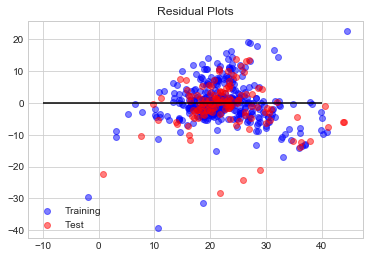

In [94]:
train = plt.scatter(pred_train,(pred_train - Y_train), c= 'b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test - Y_test),c ='r',alpha=0.5)

plt.hlines(y=0,xmin=-10,xmax=40)

plt.legend((train,test),('Training','Test'),loc = 'lower left')

plt.title('Residual Plots')

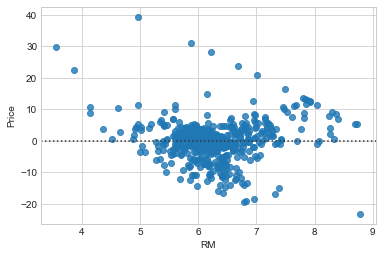

In [95]:
sns.residplot('RM', 'Price', data = boston_df)